In [1]:
import numpy as np
import json
import argparse
from torch.utils.data import DataLoader
from datasets.dl import GeMData
import torch
import os
from tqdm import tqdm, trange
from matplotlib import pyplot as plt
import collections
import pandas as pd

In [2]:
class cf:
    def __init__(self):
        self.dpath="landmark"
        self.k=19
        self.test_matrix = "pa_tdatabase.npy"
args = cf()

In [3]:
dbp = os.path.join(args.dpath, "pa_database.npy")
imagep = os.path.join(args.dpath, args.test_matrix)
classp = os.path.join(args.dpath, "paris6k_info.json")
validip = os.path.join(args.dpath, "paris6k_dbm.npy")
testip = os.path.join(args.dpath, "paris6k_qm.npy")

In [4]:
print('load data')
md = json.load(open(classp, "r"))
test_imm = torch.FloatTensor(np.load(imagep)).to(0)
db_tensor = torch.FloatTensor(np.load(dbp)).transpose(1, 0).to(0)

load data


In [5]:
validi = np.load(validip).transpose(0, 2, 3, 1)
testi = np.load(testip).transpose(0, 2, 3, 1)

In [6]:
def show_retrieved_query(cur_idx):
    
    easy = set(md[cur_idx]['easy'])
    hard = set(md[cur_idx]['hard'])
    junk = set(md[cur_idx]['junk'])
    
    cur_score = torch.matmul(test_imm[cur_idx], db_tensor).reshape(-1)
    _, topk = torch.topk(cur_score, args.k)
    topkl = topk.cpu().numpy()
    topk_imgs = validi[topkl]
    
    final_label = ['query']
    for didx in topkl:
        if didx in easy:
            final_label.append('easy')
        elif didx in hard:
            final_label.append('hard')
        elif didx in junk:
            final_label.append('junk')
        else:
            final_label.append('irrelevant')
    
    final_imgs = np.concatenate([testi[cur_idx].reshape(1, 224, 224, 3), topk_imgs], axis=0)
    f, axarr = plt.subplots(4, 5, figsize=(20, 20))
    for i in range(4):
        for j in range(5):
            cur_idx = i * 5 + j
            axarr[i][j].imshow(final_imgs[cur_idx])
            axarr[i][j].title.set_text(final_label[cur_idx])
    plt.show()

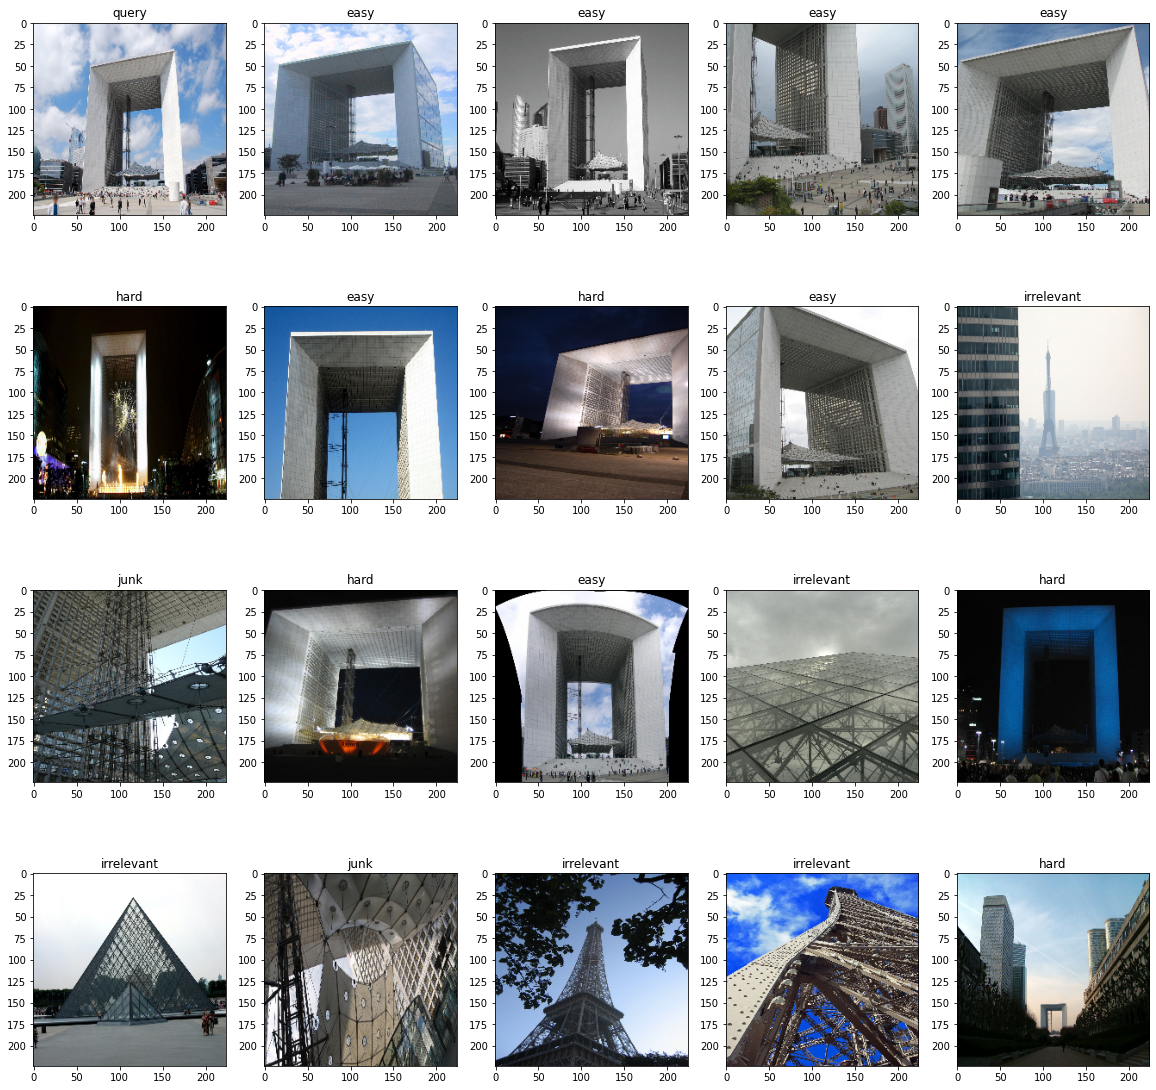

In [7]:
show_retrieved_query(1)

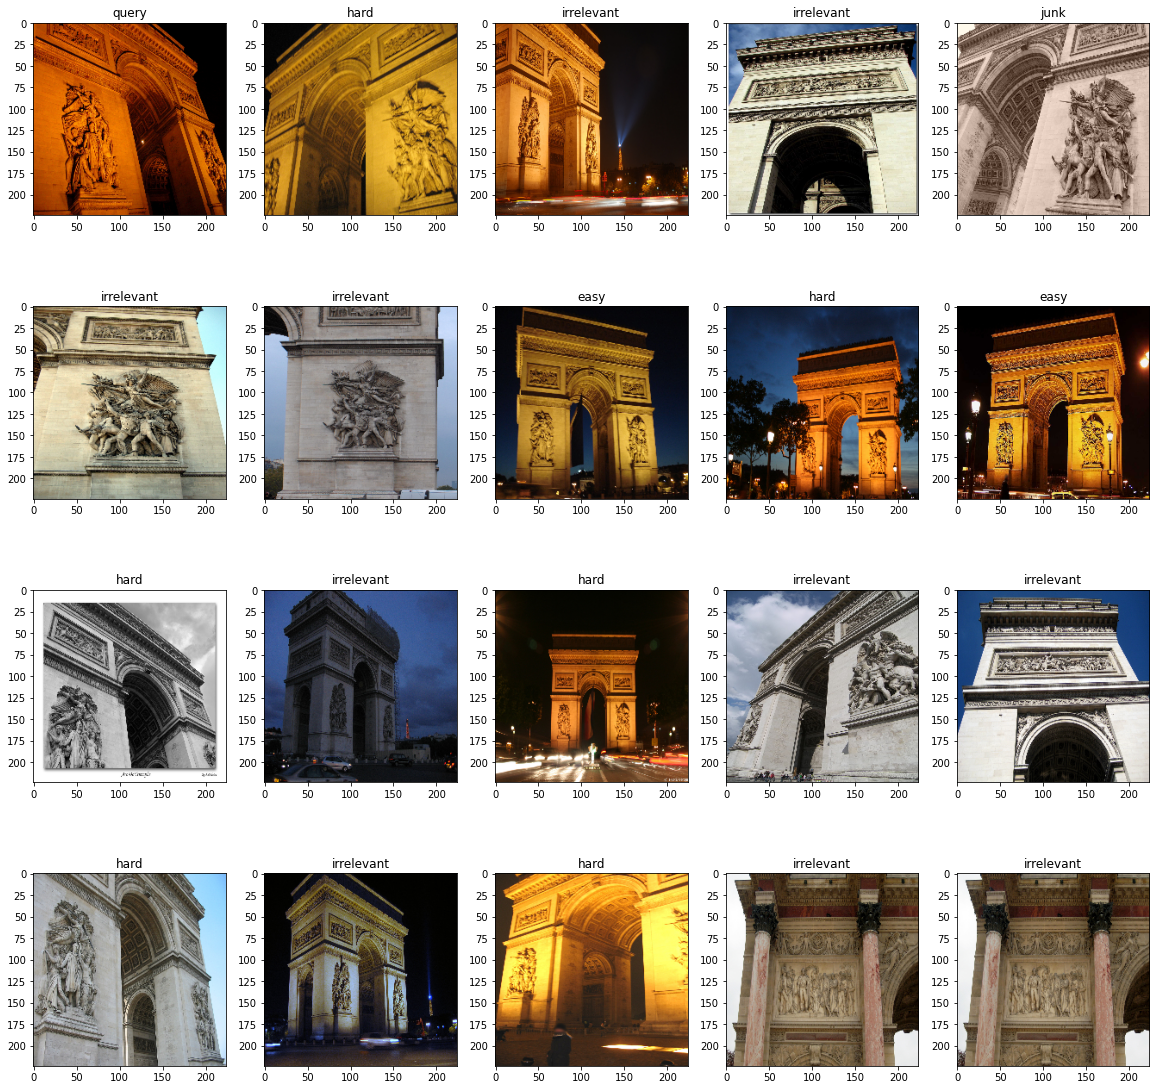

In [8]:
show_retrieved_query(69)